In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set a font that supports Hangul characters
plt.rcParams['font.family'] = 'Malgun Gothic'

print ('버전: ', matplotlib.__version__)
print ('설치 위치: ', matplotlib.__file__)
print ('설정 위치: ', matplotlib.get_configdir())
print ('캐시 위치: ', matplotlib.get_cachedir())
import matplotlib.font_manager as fm

print ('설정파일 위치: ', matplotlib.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:5]

path = 'C:\\WINDOWS\\Fonts\\malgun.ttf'
fontprop = fm.FontProperties(fname=path, size=18)
fontprop

c:\Users\kmk45\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


버전:  3.8.2
설치 위치:  c:\Users\kmk45\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\__init__.py
설정 위치:  C:\Users\kmk45\.matplotlib
캐시 위치:  C:\Users\kmk45\.matplotlib
설정파일 위치:  c:\Users\kmk45\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\mpl-data\matplotlibrc


In [6]:
df = pd.read_csv('./Financial/[1206]ESG.csv', dtype={'corp_code': str, 'stock_code': str})
df.head(5)

,회사명,corp_code,stock_code,연도,ESG,자산총계,자산별 현금흐름,부채 비율,무형자산 비중,매출액 성장률,현금 배당성향 상승률,EBITDA 성장률,임직원 성장률,최대주주 지분율,사외이사비율,비정규직(o2)
0,기아,00106641,000270,2022,B+,7.371096e+13,0.126619,0.466252,3.942399e-08,0.192893,0.023166,0.147722,0.009652,35.62,0.555556,0.044271
1,S-Oil,00138279,010950,2022,A,1.961314e+13,0.065207,0.567460,5.425854e-09,0.352968,-0.055921,0.352081,0.239521,63.44,0.081967,0.050898
2,풀무원,00155355,017810,2022,A,2.049218e+12,0.046280,0.733241,4.770911e-02,0.112535,4.023285,1.733645,0.108481,54.30,0.296296,0.072978
3,케이티,00190321,030200,2022,A,4.098068e+13,0.087775,0.550649,7.637338e-08,0.029318,0.165829,-0.044531,-0.059141,12.68,0.400000,0.035095
4,SK,00181712,034730,2022,A+,1.945059e+14,0.039473,0.630814,6.534003e-08,0.277574,0.105882,-0.012461,0.754470,26.69,0.048077,0.035761


<Axes: xlabel='ESG', ylabel='count'>

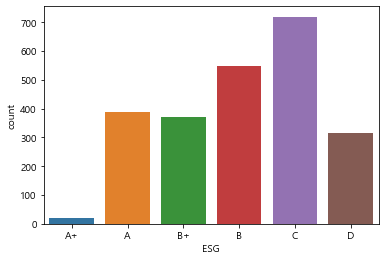

In [7]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

saved_df = df.iloc[:, :5]

cols = df.columns[5:]
scaled_df = pd.DataFrame(scaler.fit_transform(df.iloc[:, 5:]), columns=cols)

df2 = pd.concat([saved_df, scaled_df], axis=1)
df2['ESG'] = pd.Categorical(df2['ESG'], categories=['A+', 'A', 'B+', 'B', 'C', 'D'], ordered=True)
sns.countplot(data=df2, x='ESG') # dataset imbalance

In [ ]:
# # Create a 4x4 grid of subplots
# fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# # Flatten the 2D array of subplots for easier indexing
# axes = axes.flatten()

# # Loop through the selected columns and create KDE plots
# for i, col in enumerate(df3.columns[5:]):
#     sns.kdeplot(data=df3, x=col, ax=axes[i], fill=True)
#     axes[i].set_title(col)

# # Adjust layout to prevent overlapping titles
# plt.tight_layout()

# # Show the plots
# plt.show()

In [16]:
np.ones_like(df2.iloc[:, 5:].corr(), dtype=bool)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  Tr

In [17]:
np.triu(np.ones_like(df2.iloc[:, 5:].corr(), dtype=bool))

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True],
       [False, False, False, False, False, False, False, False, False,
         True,  True],
       [False, False, False, False, False, False, False, Fal

c:\Users\kmk45\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Users\kmk45\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


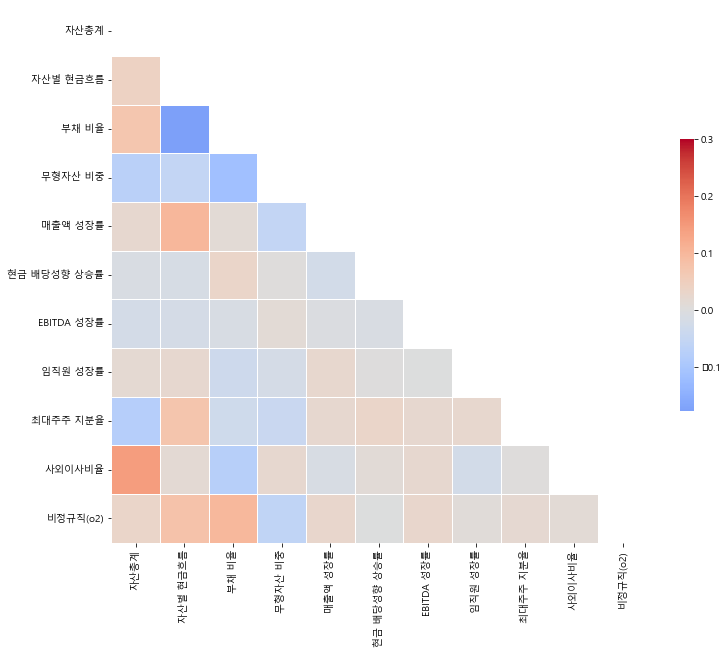

In [19]:
import numpy as np

corr_matrix = df2.iloc[:, 5:].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# 

In [20]:
corr_matrix

,자산총계,자산별 현금흐름,부채 비율,무형자산 비중,매출액 성장률,현금 배당성향 상승률,EBITDA 성장률,임직원 성장률,최대주주 지분율,사외이사비율,비정규직(o2)
자산총계,1.000000,0.042891,0.071455,-0.071910,0.023138,-0.010927,-0.022094,0.018097,-0.076558,0.145347,0.030310
자산별 현금흐름,0.042891,1.000000,-0.176805,-0.054519,0.102094,-0.015911,-0.019088,0.023201,0.074174,0.015740,0.077001
부채 비율,0.071455,-0.176805,1.000000,-0.116231,0.012553,0.033467,-0.011068,-0.034715,-0.030291,-0.076061,0.100071
무형자산 비중,-0.071910,-0.054519,-0.116231,1.000000,-0.055287,0.005018,0.011641,-0.018983,-0.043578,0.021218,-0.057623
매출액 성장률,0.023138,0.102094,0.012553,-0.055287,1.000000,-0.022688,-0.007182,0.024677,0.022685,-0.011191,0.026318
현금 배당성향 상승률,-0.010927,-0.015911,0.033467,0.005018,-0.022688,1.000000,-0.010561,0.000274,0.031904,0.009852,-0.001302
EBITDA 성장률,-0.022094,-0.019088,-0.011068,0.011641,-0.007182,-0.010561,1.000000,-0.000570,0.022679,0.021132,0.026640
임직원 성장률,0.018097,0.023201,-0.034715,-0.018983,0.024677,0.000274,-0.000570,1.000000,0.025573,-0.023946,0.009379
최대주주 지분율,-0.076558,0.074174,-0.030291,-0.043578,0.022685,0.031904,0.022679,0.025573,1.000000,0.002819,0.019563
사외이사비율,0.145347,0.015740,-0.076061,0.021218,-0.011191,0.009852,0.021132,-0.023946,0.002819,1.000000,0.011885


In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, QuantileTransformer, PowerTransformer

df = pd.read_csv('./Financial/[1206]ESG.csv', dtype={'corp_code': str, 'stock_code': str})

# scaler= StandardScaler()
scaler= MinMaxScaler()
# scaler = RobustScaler()
# scaler = QuantileTransformer(output_distribution='uniform') # 새로운 모습
# scaler = PowerTransformer()

# DF 만들기 
saved_df = df.iloc[:, :5]
scaled_df = pd.DataFrame(scaler.fit_transform(df.iloc[:, 5:]), columns=df.columns[5:])
new_df = pd.concat([saved_df, scaled_df], axis=1)

# ESG 등급 나누기
binary_ESG = new_df['ESG'].map({'A+': 1,'A': 1,'B+': 1,'B': 0,'C': 0,'D': 0,})

new_df['ESG'] = pd.Categorical(new_df['ESG'], categories=['A+', 'A', 'B+', 'B', 'C', 'D'], ordered=True)
new_df['ESG'] = new_df['ESG'].map({'A+': 6,'A': 5,'B+': 4,'B': 3,'C': 2,'D': 1})

In [12]:
new_df

,회사명,corp_code,stock_code,연도,ESG,자산총계,자산별 현금흐름,부채 비율,무형자산 비중,매출액 성장률,현금 배당성향 상승률,EBITDA 성장률,임직원 성장률,최대주주 지분율,사외이사비율,비정규직(o2)
0,기아,00106641,000270,2022,4,0.164377,0.719298,0.101154,3.077947e-08,0.927610,0.375180,0.701379,0.863827,0.356136,0.763889,0.047414
1,S-Oil,00138279,010950,2022,5,0.043737,0.663541,0.124328,4.236124e-09,0.941982,0.374226,0.701832,0.895434,0.634363,0.112705,0.054511
2,풀무원,00155355,017810,2022,5,0.004569,0.646356,0.162288,3.724791e-02,0.920395,0.423452,0.704898,0.877416,0.542954,0.407407,0.078159
3,케이티,00190321,030200,2022,5,0.091388,0.684030,0.120478,5.962695e-08,0.912923,0.376902,0.700952,0.854368,0.126713,0.550000,0.037587
4,SK,00181712,034730,2022,6,0.433754,0.640176,0.138835,5.101289e-08,0.935213,0.376178,0.701023,0.966240,0.266827,0.066106,0.038299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2354,아난티,00161781,025980,2020,1,0.002550,0.622054,0.149949,2.744024e-03,0.887743,0.374771,0.703116,0.882394,0.323232,0.368304,0.068361
2355,상상인,00306162,038540,2020,1,0.008041,0.542264,0.179457,1.184496e-02,0.893060,0.374771,0.699133,0.833146,0.319232,0.155506,0.108302
2356,씨젠,00788773,096530,2020,1,0.002441,0.922159,0.088146,4.788712e-03,0.990345,0.339726,0.703178,0.929911,0.325133,0.060238,0.019125
2357,덕산네오룩스,01061558,213420,2020,1,0.000492,0.778982,0.023578,1.292577e-01,0.939120,0.374771,0.702049,0.871714,0.570857,0.111607,0.027603
